<a href="https://colab.research.google.com/github/Rajat-Sri/Capstone_2_Retail_sales_prediction/blob/main/Retail_sales_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Retail sales prediction of Rossmann stores chain </u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### We are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## Data Description

#### Rossmann Stores Data.csv - sales related data over a period of time
#### store.csv  - stores related data


#### <u>Data fields</u>

*  **Store** - a unique Id for each store
*  **Sales** - the turnover for any given day (Dependent Variable)
* **Customers** - the number of customers on a given day
* **Open** - store open or not: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store 

In [1]:
# Importing necessary libraries for analysing and visualizing the dataset

import pandas as pd #to perform data analysis
import numpy as np #to perform operations on arrays
import matplotlib.pyplot as plt #to visualize 2d plots and graphs
import seaborn as sns #to create better visualizations more advanced statistical plots

In [2]:
# Importing store dataset from drive

store_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/2/retail sales prediction/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
# Importing sales dataset from drive

sales_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/2/retail sales prediction/Rossmann Stores Data.csv')
sales_df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# Merging both dataset and storing inside a dataframe

df = sales_df.merge(store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# **Understanding Dataset**

In [5]:
# Checking the shape(row,column) of datset

df.shape

(1017209, 18)

**Observation**

Dataset contains 1017209 Rows and 18 Columns

In [6]:
# Checking for any duplicate rows in dataset

df.duplicated().sum() #no duplicate rows found

0

In [7]:
# Checking some basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**Observations**



*   Some columns has missing data,which will be later corrected based on amount of missing data
*   Data type of few column need to be corrected specially Date column



In [8]:
# Checking for percentage of missing values in each column

df.isnull().mean()*100


Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
dtype: float64

**Observation**

*   Competition Distance column has less that 1% data missing which can easily be handled using median values,as it will not effect its skewness
*   Its better to drop columns having more than 30% of data missing after basic data analysis as it might negatively impact our model



In [9]:
# Checking the descriptive statistics 

df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


**Observation**



*   Sales of some stores can be seen 0 which indicates they are not in operations on those days either due to holidays or shops are under refurbishment.
*   Decision whether to keep these rows will depend how much they are affecting our model accuracy



In [10]:
# Checking for unique values of different columns/features

#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','Promo2']

#checking the unique values involved
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for Promo2: [0 1]


*CompetitionDistance feature has less than 1% missing data,so lets try to understand which will be better mean,meadian or mode fpr fill null values.*

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


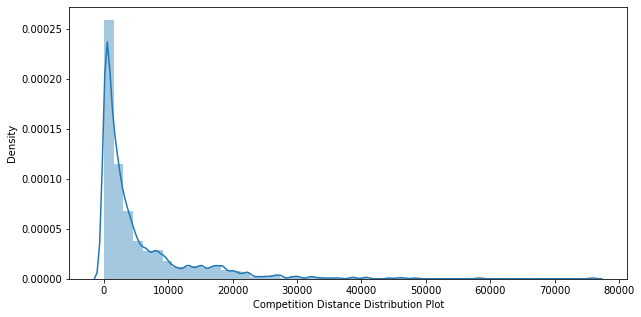

In [11]:
#distribution plot of competition distance
plt.figure(figsize=(10,5))
sns.distplot(x=df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')
plt.show()

**Observation**

Compitition distance column data is clearly right skewed so it will be better to use median value to fill null values.

In [12]:
# filling competition distance with the median value
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True)

**Observations**

*   State holiday column has 0 both in object type and integer type,this need to be corrected going ahead
*   Other columns have high missing values are filled with 0 to get a continous data for performing better EDA,later they may be dropped.

In [13]:
# Replacing object type 0 with interger type 0
df['StateHoliday'].replace({'0':0}, inplace=True)

# Replacing Nan values with 0 in CompetitionOpenSinceMonth
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(0)

# Replacing Nan values with 0 in CompetitionOpenSinceYear
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(0)

# Replacing Nan values with 0 in Promo2SinceWeek
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0)

# Replacing Nan values with 0 in Promo2SinceYear
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0)

# Replacing Nan values with 0 in PromoInterval
df['PromoInterval'] = df['PromoInterval'].fillna(0)

# Now checking Nan values
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

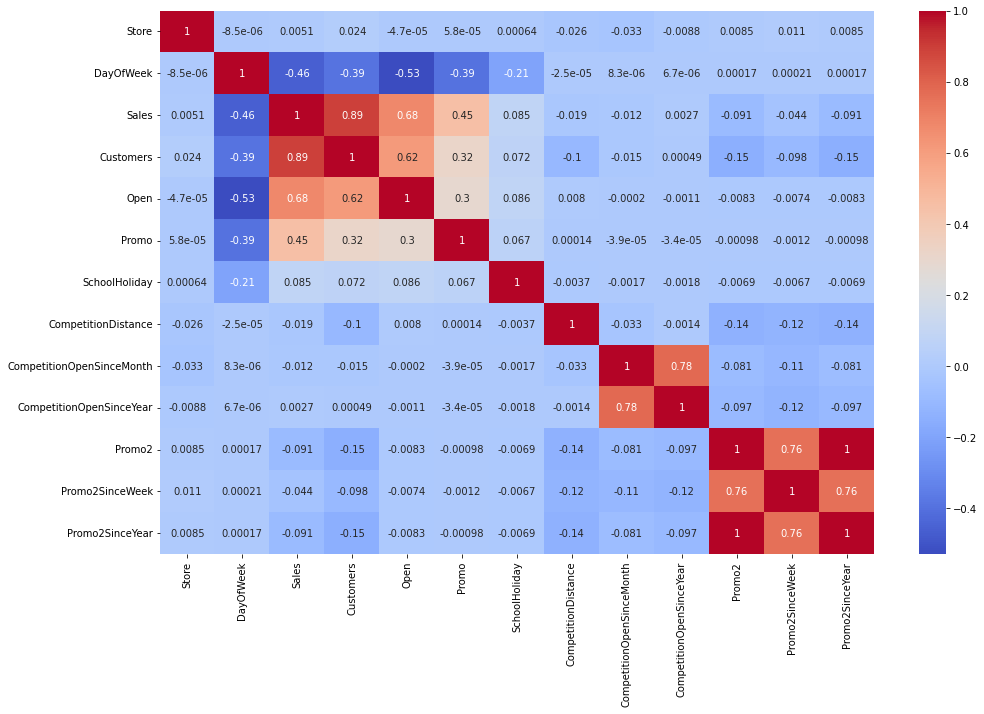

In [14]:
#Chaecking for multicollinearity between independent features using correlation heatmap

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

####Observation:
* Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
* State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
* CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
* There's multicollinearity involved in the dataset as well.
* Highly correlated features showing multicollinearity are - a.**open and customers**   b.**promo2 with promo2sinceweek and promo2sinceyear**
* Before data modelling its better to remove features like open,promo2sinceweek and promo2sinceyear to remove any collinarity among independent features.


#**Exploratory Data Analysis**
We will explore and see what factors are influencing Rossmann stores sales and how.

In [15]:
#creating features from the date for better data visualization

df['Date'] = pd.to_datetime(df['Date']) # converting from object to datetime format
df['Year'] = df['Date'].dt.year #extracting and creating Year coulmn from Date
df['Month'] = df['Date'].dt.month #extracting and creating Year coulmn from Date
df['DayOfYear'] = df['Date'].dt.dayofyear #extracting and creating Year coulmn from Date

   Year       Sales
0  2013  2302876084
1  2014  2180804896
2  2015  1389499643


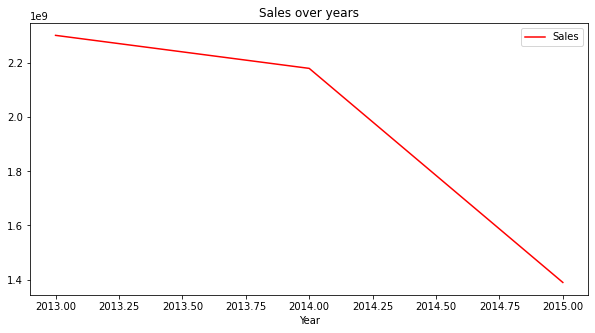

In [16]:
#Sales trends over years
sales_over_years = df.groupby(['Year'])['Sales'].sum().reset_index() # grouping by year
sales_over_years = sales_over_years.sort_values(by = ['Sales'], ascending = False) # soring data by sales in descending order
print(sales_over_years)

#Visualizing using line graph
df.groupby('Year')["Sales"].sum().plot.line(title='Sales over years',figsize=(10,5), legend=True,color='r') 
plt.show()

**Observation**

It is noticable that there is a huge drop is sale over years.

Lets dig deep to find more about above treand.

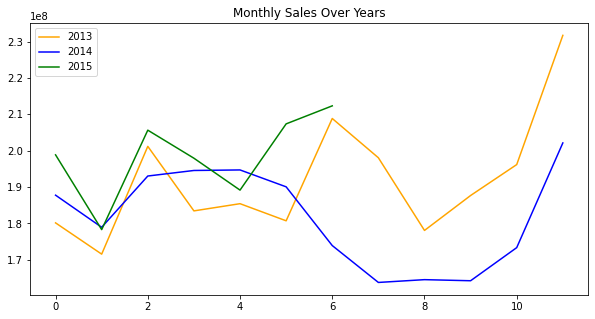

In [17]:
# Sales treands of each year seperately,for better understanding.

sales_2013 = df[df['Year']== 2013]
sales_2014 = df[df['Year']==2014]
sales_2015 = df[df['Year']== 2015]

#monthly sales for each year
sales_2013 = sales_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_2015.groupby('Month')['Sales'].sum().reset_index()

#Visualizing using line graph 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()
plt.show()

**Observations**

*  We have a given data of two and the half years. 
*  We have data of first 6 months only for the year 2015, which resulted in sudden decline of overall sales in previous line plot.
*   In 2014 from July to September we can notice near to 0 sales, this might be the time most shops were under refurbishment.
*   During November and December there is a sudden jump  in sales each year, this is because of festive seasons over those months and its a time before holidays like easter and christmas.








   DayOfWeek       Sales
0          1  1130203012
1          2  1020411930
4          5   980555941
2          3   954962863
3          4   911177709
5          6   846317735
6          7    29551433


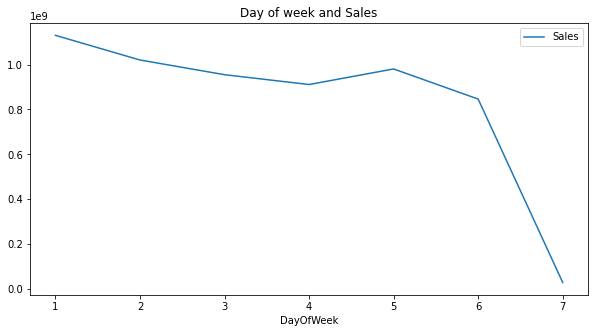

In [18]:
# Sales over different days of a week

all_week_sales = df.groupby(['DayOfWeek'])['Sales'].sum().reset_index()
all_week_sales = all_week_sales.sort_values(by = ['Sales'], ascending = False).head(7)
print(all_week_sales)

# Visualizing using line graph
df.groupby("DayOfWeek")["Sales"].sum().plot.line(title='Day of week and Sales',figsize=(10,5), legend=True)
plt.show()

**Observations**

*   There is a sudden drop in sales on Saturday and Sundays, probably because most of the shops remained closed on saturday specially on sunday, and that is why we can observe high sales on monday.




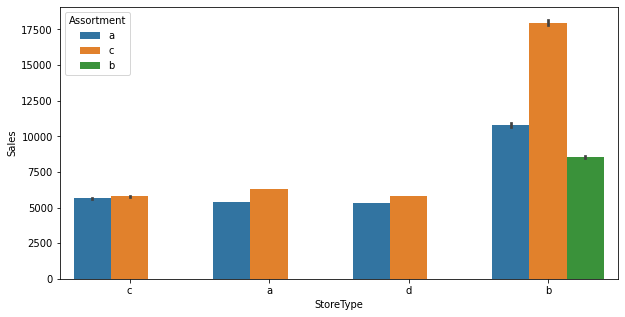

In [19]:
#Let's check the relationship between store type, assortment levels and sales
#Visualizing using bar graph
plt.figure(figsize=(10,5))
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])
plt.show()

**Observations**

*   Only Type B store type have all the 3 kinds of product assortments, which is definitely helping customers to find products they need and as a result we can clearly see highest average sales for Type B stores

*Note - This bar plot only tells that sales per store for Type B stores is higher. It did not tell about overall sales.So lets analyse further for more insights.* 



  StoreType      Store
0         a  308955088
1         b    8897182
2         c   83229564
3         d  166957910


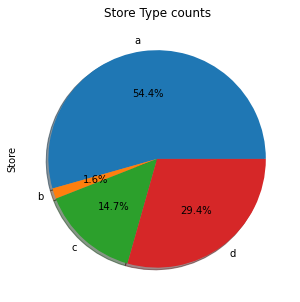

In [20]:
#Count of each store type
store_type_store_count = df.groupby(['StoreType'])['Store'].sum().reset_index()
print(store_type_store_count)

#Visualizing using pie chart
df.groupby("StoreType")["Store"].sum().plot.pie(title='Store Type counts', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

**Observations**

*   Around 55% of stores are of Type A, and least number of stores are of Type B.



  StoreType  Customers
0         a  363541434
3         d  156904995
2         c   92129705
1         b   31465621


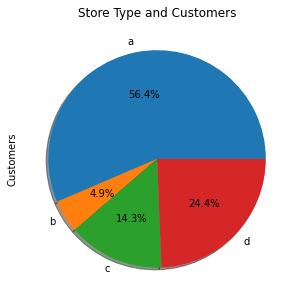

In [21]:
# Total Customer counts for each store types
store_type_customers = df.groupby(['StoreType'])['Customers'].sum().reset_index()
store_type_customers = store_type_customers.sort_values(by = ['Customers'], ascending = False).head()
print(store_type_customers)

#Visualizing using pie chart
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Store Type and Customers',figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

**Observations**

*   Type A stores have highest number of customers, and Type B has the least.This is quite evident as most stores are of Type A and Type B has least amount of stores.



  StoreType       Sales
0         a  3165334859
3         d  1765392943
2         c   783221426
1         b   159231395


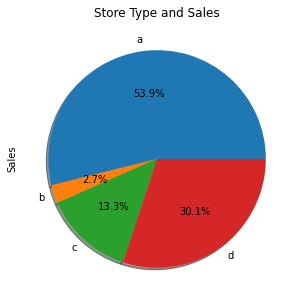

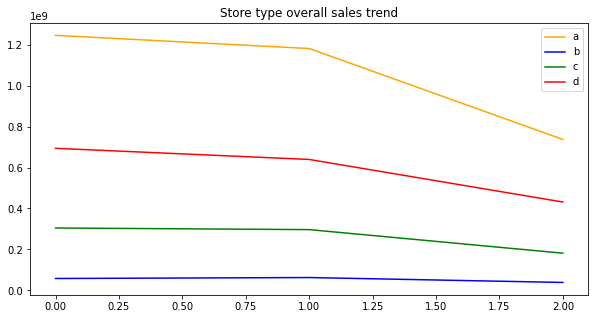

In [22]:
#Total sales of each store type over the years
store_type_sales = df.groupby(['StoreType'])['Sales'].sum().reset_index()
store_type_sales = store_type_sales.sort_values(by = ['Sales'], ascending = False).head()
print(store_type_sales)

#Visualizing using pie chart
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales',figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

# Overall Sales treands for different store types seperately,for better understanding.

store_a = df[df['StoreType']== 'a']
store_b = df[df['StoreType']=='b']
store_c = df[df['StoreType']== 'c']
store_d = df[df['StoreType']== 'd']

store_a = store_a.groupby('Year')['Sales'].sum().reset_index()
store_b = store_b.groupby('Year')['Sales'].sum().reset_index()
store_c = store_c.groupby('Year')['Sales'].sum().reset_index()
store_d = store_d.groupby('Year')['Sales'].sum().reset_index()

# Visualizing using line graph
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(store_a.loc[:,'Sales'],label='a',color='orange')
plt.plot(store_b.loc[:,'Sales'],label='b',color='blue')
plt.plot(store_c.loc[:,'Sales'],label='c',color='green')
plt.plot(store_d.loc[:,'Sales'],label='d',color='red')
plt.title('Store type overall sales trend')
plt.legend()
plt.show()

**Observations**

*   As expected, sales of Type A stores is maximum clearly beacause of their huge market share of more than 50%,but there is a declining trend as well in sales of all store types.

* It is also noticable that most sharp fall in sales for Store Type A.



  Assortment  Customers
0          a  332766938
2          c  294302292
1          b   16972525


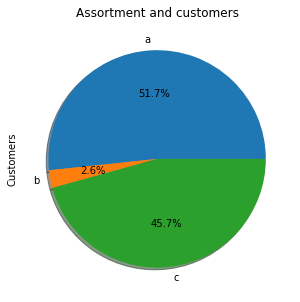

  Assortment       Sales
0          a  2945750070
2          c  2856484241
1          b    70946312


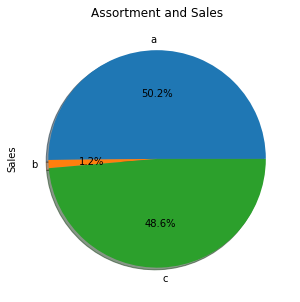

In [23]:
# Customers preferance over different types of assortments

Assortment_customers = df.groupby(['Assortment'])['Customers'].sum().reset_index()
Assortment_customers = Assortment_customers.sort_values(by = ['Customers'], ascending = False).head()
print(Assortment_customers)

#Visualizing
df.groupby("Assortment")["Customers"].sum().plot.pie(title='Assortment and customers', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

# Sales of different types of assortments
Assortment_sales = df.groupby(['Assortment'])['Sales'].sum().reset_index()
Assortment_sales = Assortment_sales.sort_values(by = ['Sales'], ascending = False).head()
print(Assortment_sales)

#Visualizing
df.groupby("Assortment")["Sales"].sum().plot.pie(title='Assortment and Sales', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

**Observations**

*   Most customers like only basic or extended levels of assortments.
*   As a result A and C assorments generate most of the sales



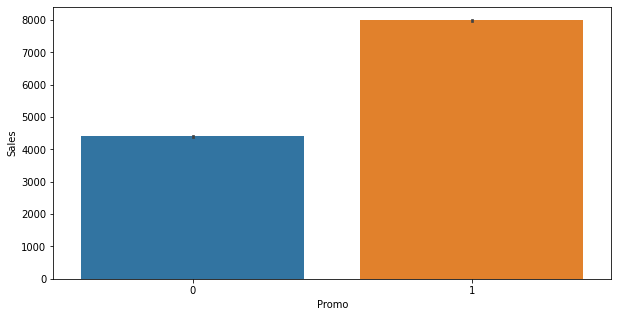

In [24]:
# Affect of promo over sales

plt.figure(figsize=(10,5))
sns.barplot(x=df["Promo"],y=df['Sales'])
plt.show()

**Observations**

*   Stores using product promotions really helped them by boosting sales by about two times.



   Promo  Promo2       Sales
0      0       0  1482612096
1      0       1  1289362241
2      1       0  1628930532
3      1       1  1472275754


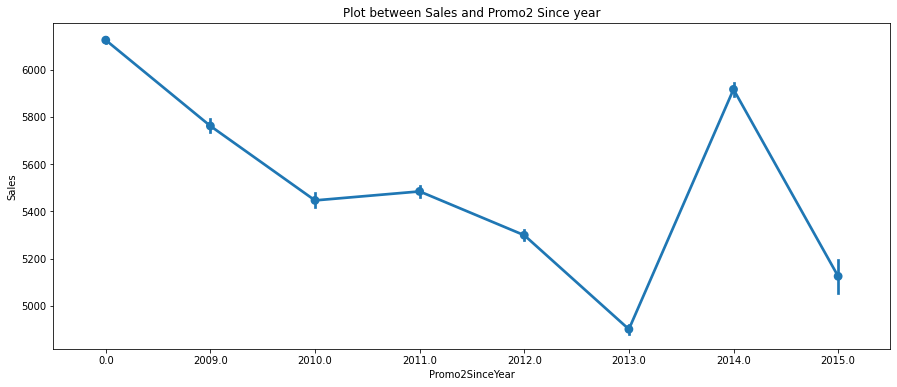

In [25]:
# Affect of extended promotions over overall sales

promo2_sales = df.groupby(['Promo','Promo2'])['Sales'].sum().reset_index()
print(promo2_sales)

plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Promo2 Since year')
plt.show()

**Observations**

Promo = Promotions , Promo2 = Extended Promotions

*   Promotions really helped in boosting sales trends, but extended promotions had negatively impacted the overall sales of the stores




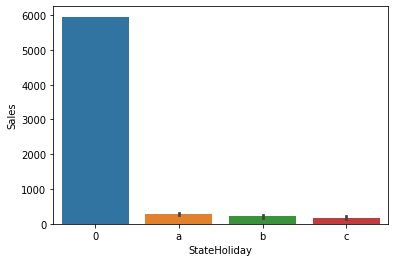

In [26]:
# Sales during state holidays

sns.barplot(x="StateHoliday", y="Sales", data=df)
plt.show()

**Observations**

a = public holiday, b = Easter holiday, c = Christmas, 0 = None

*   Low volume of sales clearly indicates that most of the stores are closed during state holoidays.






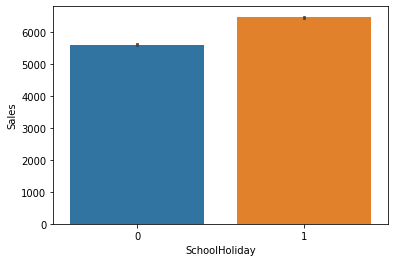

In [27]:
# Sales during school holidays

schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=df)

**Observations**

*   Stores during school holidays got more sales comared to days when schools were opened, probabily because childeren might be shopping with parents which resulted in impulsive buy.




## **EDA Conclusions**

1.   There is a sudden jump in sales during november and december. This may be due to festivals like easter, christmas eve and new year.
2.   Most of the store are closed on weekend ie saturday and sunday,but specially on sunday, as a result huge spike in sales could be observed on monday.
3.  Product promotions really boosted overall sales but it is also observed that extended promotions have negatively impacted sales in longer run.
4. During Public holiday, easter and christmas most of the store remain close which result in significant drop in sales on those days.
5. Only Type b stores had all three kinds of assortment levels. It seems that like b type stores has more variety as compared to others as a result the revenue per store is significantly more than the others store types.
6. In 2014 from July to September we can notice close to 0 sales, this might be the time most shops we under refurbishment.
7. Store type A and D had most share of market so there is quite a lot of scope of improvements for type B and C to penetrate the market. 



# **Data Manipulation and Feature Selection**

In [28]:
df.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,212


In [29]:
#we need only meaningful numeric columns here, let's drop the unnecessary columns having high missing values or showing muliticollinearity.

columns_to_drop = ['Open','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval','Month']
df1 = df.drop(columns = columns_to_drop, axis =1)
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)
df1.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,0,2015,212


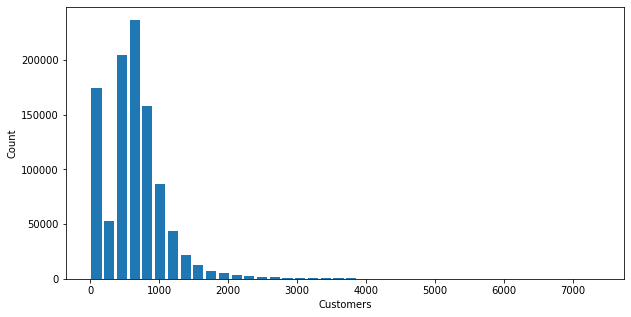

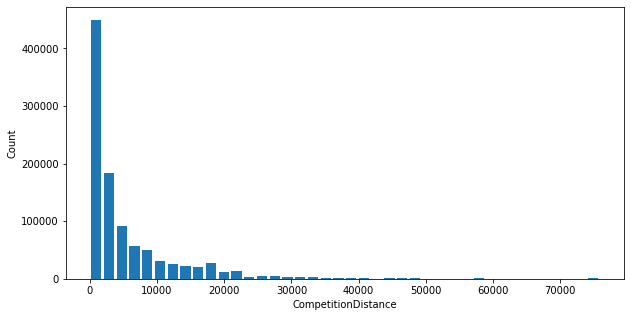

In [30]:
# Checking if outlier removal is necessary or not ?

plt.figure(figsize=(10,5))
plt.hist(df1.Customers, bins=40, rwidth=0.8)
plt.xlabel('Customers')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10,5))
plt.hist(df1.CompetitionDistance, bins=40, rwidth=0.8)
plt.xlabel('CompetitionDistance')
plt.ylabel('Count')
plt.show()


Observations - 
*  Customer count is distributed from 0 to around 4000.We can observe continous data without outliers.Though data is not normally distributed,but that can be handeled during data transformation.
* CompetitionDistance range varies from 0 to around 80km.We can observe continous data for around 45km distance.So for the sake of getting better predictions we will be removing CompetitioDistance over 50km or 50000.

In [31]:
# Removing rows with distance more than 50000
df1 = df1[(df1.CompetitionDistance<50000)]
print('before outlier removal:',len(df))
print('after outlier removal:',len(df1))
print('outlier count:',len(df)-len(df1))

before outlier removal: 1017209
after outlier removal: 1015325
outlier count: 1884


Observation
* We removed less than 1% of data which is acceptable

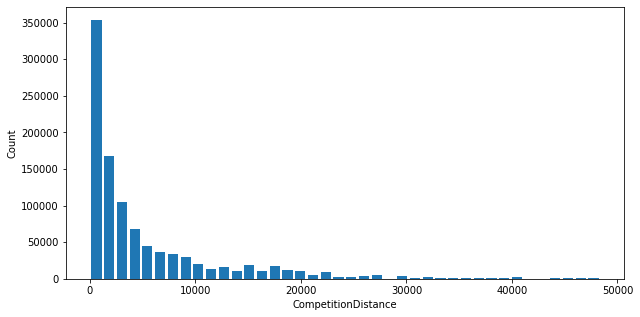

In [32]:
plt.figure(figsize=(10,5))
plt.hist(df1.CompetitionDistance, bins=40, rwidth=0.8)
plt.xlabel('CompetitionDistance')
plt.ylabel('Count')
plt.show()

In [33]:
#setting date as index
df1.set_index(['Date'],inplace=True)

#sorting index following the time series
df1.sort_index(inplace=True)

In [34]:
#slicing the most recent six weeks and creating train and test set as we have to predict the sales of most recent 6 weeks sales from the given data itself.

#train data
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df1.loc[start_train:end_train]

#test data
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df1.loc[start_test:end_test]

In [35]:
#X and y split for train and test 

X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]

X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]

print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (963014, 12)
The shape of y_train is: (963014, 1)
The shape of X_test is: (52311, 12)
The shape of y_test is: (52311, 1)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


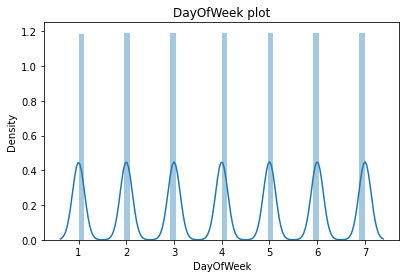

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


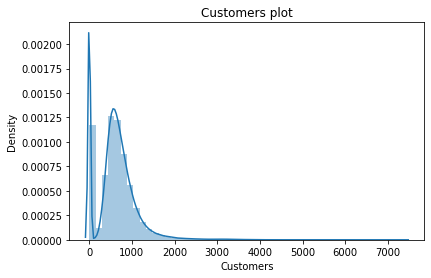

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


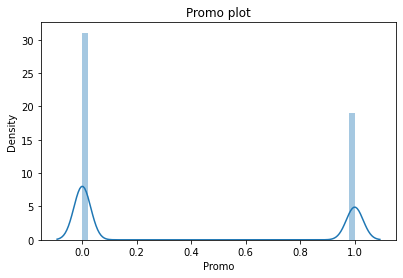

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


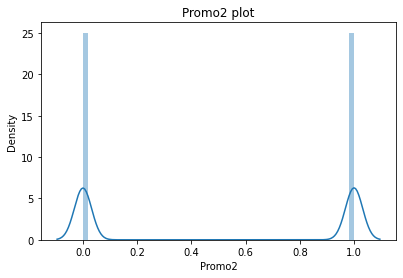

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


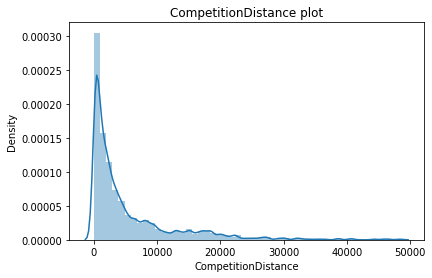

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


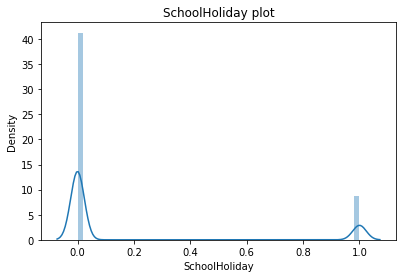

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


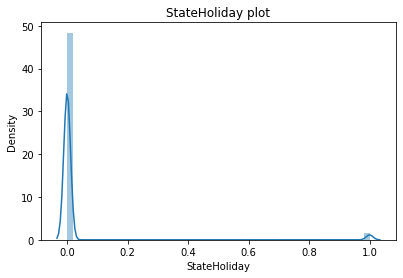

In [36]:
# Checking for data skewness.

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['DayOfWeek'])
plt.title('DayOfWeek plot')
plt.show()


plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Customers'])
plt.title('Customers plot')
plt.show()


plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Promo'])
plt.title('Promo plot')
plt.show()

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Promo2'])
plt.title('Promo2 plot')
plt.show()


plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['CompetitionDistance'])
plt.title('CompetitionDistance plot')
plt.show()



plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['SchoolHoliday'])
plt.title('SchoolHoliday plot')
plt.show()

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['StateHoliday'])
plt.title('StateHoliday plot')
plt.show()

**Observations**

Most data is normally distributed except customers and compitition distance which are right skewed.As they are right skewed so appliying log transformation to make them normally distributed.

In [37]:
# We will be using log transformation, as it is most effectively normalizes the right skewed data .

#Train
X_train[["Customers","CompetitionDistance"]] = X_train[["Customers","CompetitionDistance"]].apply(np.log1p)
X_train= pd.DataFrame(X_train,columns = X_train.columns)

#Test
X_test[["Customers","CompetitionDistance"]] = X_test[["Customers","CompetitionDistance"]].apply(np.log1p)
X_test= pd.DataFrame(X_test,columns = X_test.columns)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


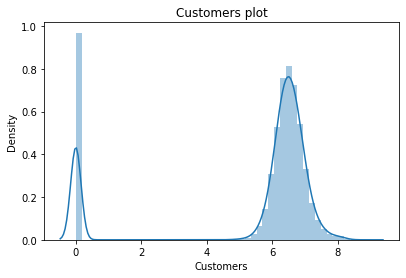

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


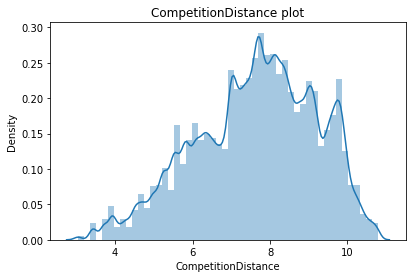

In [38]:
# Now again checking to see if data got normalised or not

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Customers'])
plt.title('Customers plot')
plt.show()

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['CompetitionDistance'])
plt.title('CompetitionDistance plot')
plt.show()

In [39]:
#One hot encoding features

#importing
from sklearn.preprocessing import OneHotEncoder

#categorical features
categorical_cols = ['StoreType', 'Assortment']

#fit encoder
encoder = OneHotEncoder(sparse=False,drop='first')

# train
encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names(categorical_cols))
X_train[encoded_features] = encoder.transform(X_train[categorical_cols])

# test
X_test[encoded_features] = encoder.transform(X_test[categorical_cols])

# drop original features
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test.drop(categorical_cols,axis=1,inplace=True)

# check
X_train.head(1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,DayOfYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
Date,,,,,,,,,,,,,,,
2013-01-01,1115,2,0.0,0,1,1,8.585039,1,2013,1,0.0,0.0,1.0,0.0,1.0


In [40]:
# scaling data

#Importing
from sklearn.preprocessing import StandardScaler

#fit encoder
stdsc = StandardScaler()

#Train
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])

#Test
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

#check
X_train.head(1)

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,DayOfYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
Date,,,,,,,,,,,,,,,
2013-01-01,1.727281,-1.002671,-2.161293,-0.781424,5.48297,2.174788,0.610772,0.998269,-1.028234,-1.535325,-0.12592,-0.39484,1.499108,-0.090778,1.077642


**Data Modelling**

## **Linear regression**

In [41]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

#calculate metrics and print the results for test set
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred),6)

#Mean Squared Error or MSE
MSE = round(mean_squared_error(y_test, y_pred),6)

#Root Mean Squared Error or RMSE
RMSE = round(mean_squared_error(y_test, y_pred,squared=False),6)

#R2 score
R2 = round(r2_score(y_test, y_pred),6)

#Adjusted R2 score
Adj = round(1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

#printing test results
print(f'The Mean Absolute Error for the validation set is {MAE}')
print(f'The Mean Squared Error for the validation set is {MSE}')
print(f'The Root Mean Squared Error for the validation set is {RMSE}')
print(f'The R^2 for the validation set is {R2}')
print(f'The Adjusted R^2 for the validation set is {Adj}')

The Mean Absolute Error for the validation set is 1626.248852
The Mean Squared Error for the validation set is 5168430.993696
The Root Mean Squared Error for the validation set is 2273.41835
The R^2 for the validation set is 0.628904
The Adjusted R^2 for the validation set is 0.628797


In [ ]:
# from scipy.stats import zscore
# from sklearn.linear_model import Lasso, Ridge
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import r2_score as r2, mean_squared_error as mse
# import math
# from sklearn.ensemble import RandomForestRegressor
# import lightgbm as lgb
# from sklearn.metrics import r2_score
# from sklearn.metrics import confusion_matrix,classification_report

## **Lasso Regression**

In [42]:
from sklearn.linear_model import Lasso
L1 = Lasso(alpha = 0.2, max_iter=10000)
L1.fit(X_train, y_train)

y_pred = L1.predict(X_test)

#calculate metrics and print the results for test set
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred),6)

#Mean Squared Error or MSE
MSE = round(mean_squared_error(y_test, y_pred),6)

#Root Mean Squared Error or RMSE
RMSE = round(mean_squared_error(y_test, y_pred,squared=False),6)

#R2 score
R2 = round(r2_score(y_test, y_pred),6)

#Adjusted R2 score
Adj = round(1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

#printing test results
print(f'The Mean Absolute Error for the validation set is {MAE}')
print(f'The Mean Squared Error for the validation set is {MSE}')
print(f'The Root Mean Squared Error for the validation set is {RMSE}')
print(f'The R^2 for the validation set is {R2}')
print(f'The Adjusted R^2 for the validation set is {Adj}')

The Mean Absolute Error for the validation set is 1626.087975
The Mean Squared Error for the validation set is 5168324.773908
The Root Mean Squared Error for the validation set is 2273.394989
The R^2 for the validation set is 0.628911
The Adjusted R^2 for the validation set is 0.628805


## **Ridge Regression**

In [43]:
from sklearn.linear_model import Ridge
L2 = Ridge(alpha = 0.5)

L2.fit(X_train, y_train)

y_pred = L2.predict(X_test)

#calculate metrics and print the results for test set
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred),6)

#Mean Squared Error or MSE
MSE = round(mean_squared_error(y_test, y_pred),6)

#Root Mean Squared Error or RMSE
RMSE = round(mean_squared_error(y_test, y_pred,squared=False),6)

#R2 score
R2 = round(r2_score(y_test, y_pred),6)

#Adjusted R2 score
Adj = round(1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

#printing test results
print(f'The Mean Absolute Error for the validation set is {MAE}')
print(f'The Mean Squared Error for the validation set is {MSE}')
print(f'The Root Mean Squared Error for the validation set is {RMSE}')
print(f'The R^2 for the validation set is {R2}')
print(f'The Adjusted R^2 for the validation set is {Adj}')

The Mean Absolute Error for the validation set is 1626.248479
The Mean Squared Error for the validation set is 5168430.766772
The Root Mean Squared Error for the validation set is 2273.4183
The R^2 for the validation set is 0.628904
The Adjusted R^2 for the validation set is 0.628797


## **Decision Tree**

In [44]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor(max_depth=5)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

#calculate metrics and print the results for test set
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred),6)

#Mean Squared Error or MSE
MSE = round(mean_squared_error(y_test, y_pred),6)

#Root Mean Squared Error or RMSE
RMSE = round(mean_squared_error(y_test, y_pred,squared=False),6)

#R2 score
R2 = round(r2_score(y_test, y_pred),6)

#Adjusted R2 score
Adj = round(1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

#printing test results
print(f'The Mean Absolute Error for the validation set is {MAE}')
print(f'The Mean Squared Error for the validation set is {MSE}')
print(f'The Root Mean Squared Error for the validation set is {RMSE}')
print(f'The R^2 for the validation set is {R2}')
print(f'The Adjusted R^2 for the validation set is {Adj}')

The Mean Absolute Error for the validation set is 986.961901
The Mean Squared Error for the validation set is 2186221.408696
The Root Mean Squared Error for the validation set is 1478.58764
The R^2 for the validation set is 0.843028
The Adjusted R^2 for the validation set is 0.842983


# **Random Forest**

In [46]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)

random_forest.fit(X_train, y_train)


y_pred = random_forest.predict(X_test)

#calculate metrics and print the results for test set
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred),6)

#Mean Squared Error or MSE
MSE = round(mean_squared_error(y_test, y_pred),6)

#Root Mean Squared Error or RMSE
RMSE = round(mean_squared_error(y_test, y_pred,squared=False),6)

#R2 score
R2 = round(r2_score(y_test, y_pred),6)

#Adjusted R2 score
Adj = round(1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

#printing test results
print(f'The Mean Absolute Error for the validation set is {MAE}')
print(f'The Mean Squared Error for the validation set is {MSE}')
print(f'The Root Mean Squared Error for the validation set is {RMSE}')
print(f'The R^2 for the validation set is {R2}')
print(f'The Adjusted R^2 for the validation set is {Adj}')

<ipython-input-46-0e356b0306a3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


The Mean Absolute Error for the validation set is 776.143445
The Mean Squared Error for the validation set is 1337655.587789
The Root Mean Squared Error for the validation set is 1156.570615
The R^2 for the validation set is 0.903956
The Adjusted R^2 for the validation set is 0.903928


In [47]:
# Create model
from sklearn.ensemble import RandomForestRegressor
rf_tuned = RandomForestRegressor()

#import
from sklearn.model_selection import RandomizedSearchCV
#grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100, 130, 150]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

#fitting
rf_random.fit(X_train,y_train)

y_pred_1 = rf_random.predict(X_test)

#calculate metrics and print the results for test set
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred_1),6)

#Mean Squared Error or MSE
MSE = round(mean_squared_error(y_test, y_pred_1),6)

#Root Mean Squared Error or RMSE
RMSE = round(mean_squared_error(y_test, y_pred_1,squared=False),6)

#R2 score
R2 = round(r2_score(y_test, y_pred_1),6)

#Adjusted R2 score
Adj = round(1 - (1-r2_score(y_test, y_pred_1)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 5.1min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 5.2min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 5.0min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.9min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 6.1min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 6.0min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time= 3.0min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time= 3.1min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time= 3.3min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 5.2min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 5.2min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 5.1min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 6.9min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 7.1min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 7.0min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 4.6min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 4.8min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 4.8min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 7.6min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 7.9min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 7.7min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time= 3.0min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time= 3.1min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time= 3.1min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time= 3.2min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time= 3.2min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time= 3.1min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 1.6min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 1.7min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 1.7min


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [48]:
#printing test results
print(f'The Mean Absolute Error for the validation set is {MAE}')
print(f'The Mean Squared Error for the validation set is {MSE}')
print(f'The Root Mean Squared Error for the validation set is {RMSE}')
print(f'The R^2 for the validation set is {R2}')
print(f'The Adjusted R^2 for the validation set is {Adj}')

The Mean Absolute Error for the validation set is 338.353553
The Mean Squared Error for the validation set is 292651.773624
The Root Mean Squared Error for the validation set is 540.972988
The R^2 for the validation set is 0.978987
The Adjusted R^2 for the validation set is 0.978981


In [49]:
#best para
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [50]:
#save the best parameters
random_t = rf_random.best_estimator_

In [51]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)


<ipython-input-51-54edbc5e7e27>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()


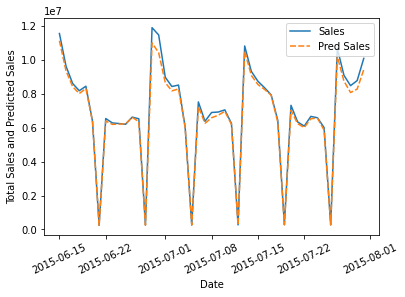

In [52]:
#evaluate tuned model
random_tuned = model_evaluation('Random Forest Tuned',random_t,X_train,y_train,X_test,y_test)

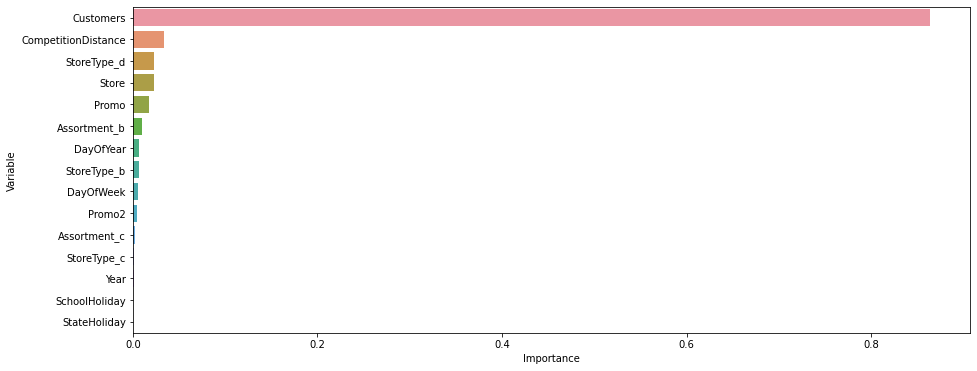

In [53]:
#visualising feature importance of tuned random forest regressor
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": random_t.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)

plt.figure(figsize=(15,6))
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])
plt.show()

In [54]:
#test values

random_r2 = 0.903928
r_tuned_r2 = 0.978981

In [55]:
#improvement % 
improvement_r = ((r_tuned_r2 - random_r2)/random_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Tuned Random Forest against Random Forest.')

Model Performance
Improvement of 8.303 % was seen in Tuned Random Forest against Random Forest.


In [56]:
#predictions 
y_pred_test = random_t.predict(X_test)
six_weeks_sales_df = y_test.copy()
six_weeks_sales_df['Pred_Sales'] = y_pred_test.tolist()

In [60]:
#head
six_weeks_sales_df.sample(10)

,Sales,Pred_Sales
Date,,
2015-06-18,7495,7473.12
2015-07-27,7809,7357.51
2015-07-30,6494,6243.07
2015-06-23,4166,4162.22
2015-06-25,3631,3898.00
2015-06-18,9593,8336.45
2015-06-27,6971,6919.44
2015-07-21,4324,4670.29
2015-06-21,0,0.00


In [61]:
import lightgbm as lgb
light_lgb = lgb.LGBMRegressor(n_estimators=700)

light_lgb.fit(X_train, y_train)


y_pred = light_lgb.predict(X_test)

#calculate metrics and print the results for test set
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred),6)

#Mean Squared Error or MSE
MSE = round(mean_squared_error(y_test, y_pred),6)

#Root Mean Squared Error or RMSE
RMSE = round(mean_squared_error(y_test, y_pred,squared=False),6)

#R2 score
R2 = round(r2_score(y_test, y_pred),6)

#Adjusted R2 score
Adj = round(1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

#printing test results
print(f'The Mean Absolute Error for the validation set is {MAE}')
print(f'The Mean Squared Error for the validation set is {MSE}')
print(f'The Root Mean Squared Error for the validation set is {RMSE}')
print(f'The R^2 for the validation set is {R2}')
print(f'The Adjusted R^2 for the validation set is {Adj}')

The Mean Absolute Error for the validation set is 349.185617
The Mean Squared Error for the validation set is 281218.775977
The Root Mean Squared Error for the validation set is 530.300647
The R^2 for the validation set is 0.979808
The Adjusted R^2 for the validation set is 0.979803
